In [42]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt 
import seaborn as sns

Q.1 a Model using Random Forest

1. Importing the data

In [43]:
# using text to colum feature I made it's better version so I can do further process

red_wine = pd.read_csv(r"\Users\Admin\red_wine.csv")

In [44]:
red_wine.describe()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [45]:
red_wine.head()

,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Feature Engineering

In [46]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
    red_wine.isnull().sum())
# no null point

 
Count total NaN at each column in a DataFrame : 

 fixed acidity             0
"volatile acidity"        0
"citric acid"             0
"residual sugar"          0
"chlorides"               0
"free sulfur dioxide"     0
"total sulfur dioxide"    0
"density"                 0
"pH"                      0
"sulphates"               0
"alcohol"                 0
"quality"                 0
dtype: int64


correlation matrix

<Axes: >

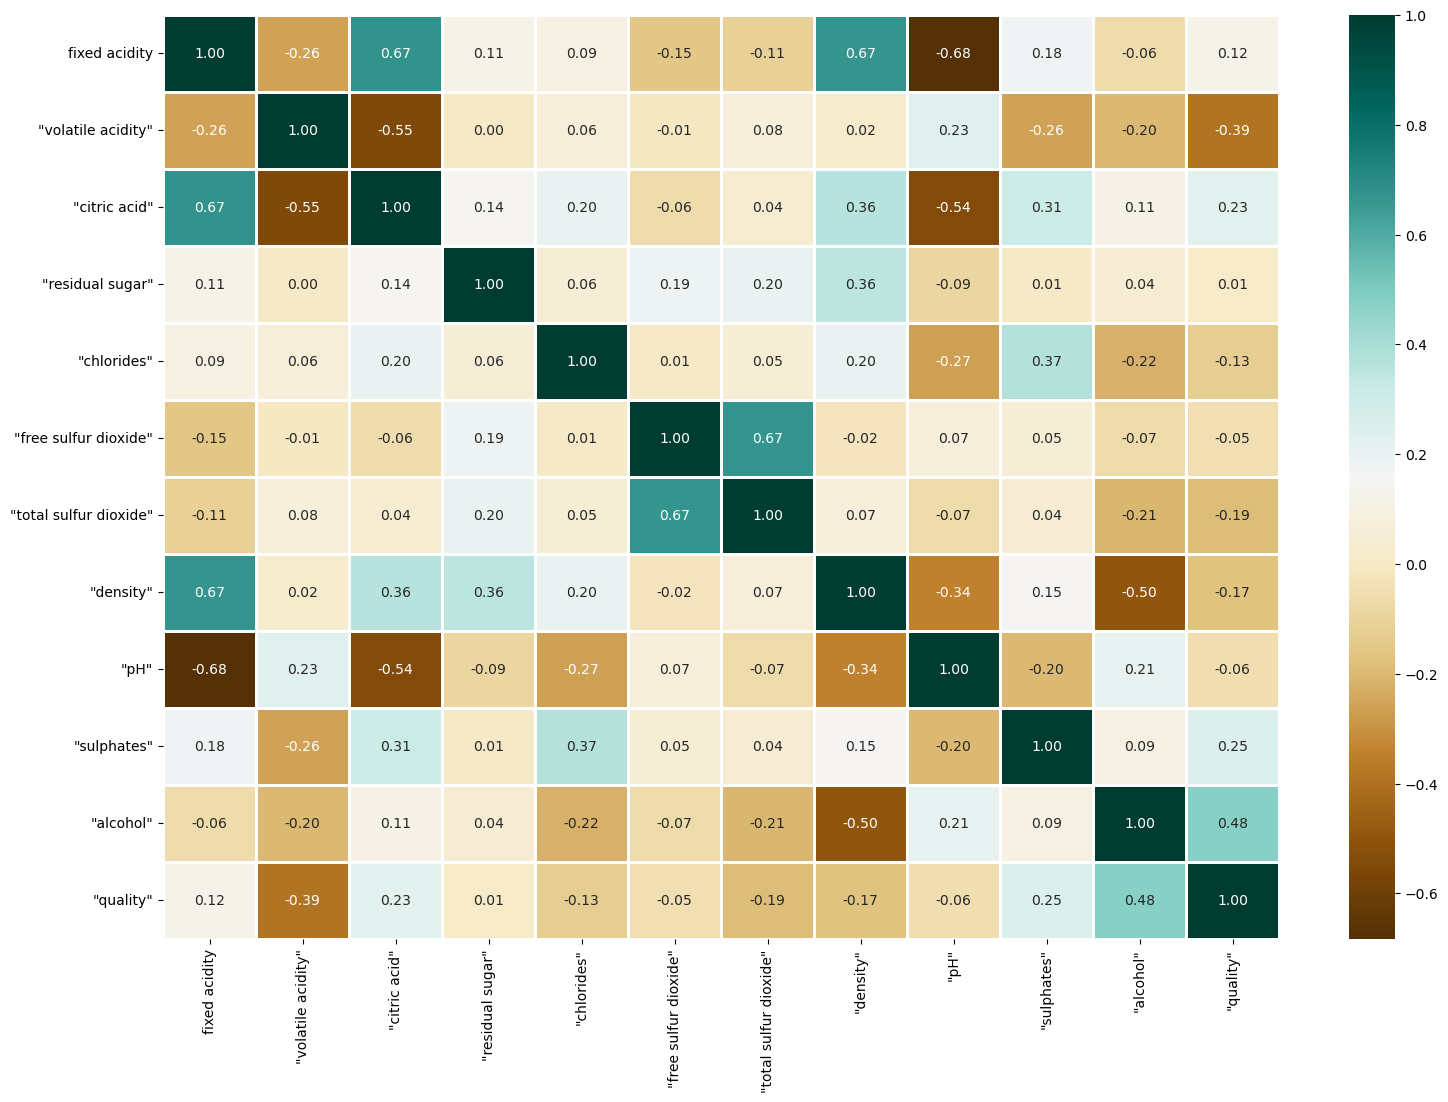

In [47]:
plt.figure(figsize=(18, 12))
sns.heatmap(red_wine.corr(),
cmap = 'BrBG',
fmt = '.2f',
linewidths = 2,
annot = True)


In [48]:
# check for categorical data
data_types = red_wine.dtypes
# Identify columns with data types indicating categorical variables
categorical_columns = data_types[data_types=='object'].index
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index([], dtype='object')


In [49]:
# since the list of categorical column is empty it means there is no categorical data
# therefore no one hot encodeing required

In [50]:
# Scale numerical features

In [51]:
# StandardScaler is used to standardize features by removing the mean 
#and scaling to unit variance.
scaler = StandardScaler()
# his line applies the StandardScaler to the numerical features of 
#the wine dataset, excluding the target variable 'quality'.
scaled_features = scaler.fit_transform(red_wine.drop('"quality"',axis = 1))
#this line creates a new DataFrame called 'wine_data_scaled' containing the 
#scaled numerical features.excluding the 'quality' column
red_wine_scaled = pd.DataFrame(scaled_features,columns = red_wine.columns[:-1])

In [52]:
# Split data into features (X) and target variable (y)
X = red_wine_scaled
y = red_wine['"quality"']

In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
model = RandomForestRegressor()

In [55]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
from sklearn.metrics import mean_squared_error

# make prediction on test set
predictions = model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test,predictions)
print(f"Mean Squared Error : {mse}")

from sklearn.metrics import r2_score

# Calculate R^2 score
r2_random_for = r2_score(y_test, predictions)
print(f"R^2 Score for random forest: {r2_random_for}")

Mean Squared Error : 0.3437725
R^2 Score for random forest: 0.4577921261783008


7. Define hyperparameters to search (search for best combinations of hyperparameters)

In [57]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [58]:
from sklearn.metrics import mean_squared_error

# make prediction on test set
predictions = best_model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test,predictions)
print(f"Mean Squared Error : {mse}")

from sklearn.metrics import r2_score

# Calculate R^2 score
r2_random_for = r2_score(y_test, predictions)
print(f"R^2 Score for random forest: {r2_random_for}")

Mean Squared Error : 0.3478017708333333
R^2 Score for random forest: 0.4514370443390221


In [59]:
# Save the trained model using pickle
import pickle
with open('red_wine_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [60]:
import pickle

# Load the trained model
with open('red_wine_model.pkl', 'rb') as file:
    best_model = pickle.load(file)  # Load the model using pickle.load() with the file object

# Prepare input data
input_data = [[7.5,0.9,0.5,2.0,0,17,50,0.92,3.6,0.5,9.4]]  # Format the input data appropriately

# Make predictions
predictions = best_model.predict(input_data)

# Process predictions
print("Predictions:", predictions)


Predictions: [6.205]


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# B. Support vector RBF using kernal¶

In [61]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
red_wine_2 = pd.read_csv(r"\Users\Admin\red_wine.csv")

# Step 2: Split the data into features (X) and target variable (y)
X = red_wine_2.drop(columns=['"quality"'])  # Features
y = red_wine_2['"quality"']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Preprocessing (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define and train the model
svm_rbf_model = SVR(kernel='rbf')
svm_rbf_model.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model
y_pred = svm_rbf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.3513741345230522


In [62]:
from sklearn.metrics import r2_score
r2_svr = r2_score(y_test, y_pred)
print(f"R^2 Score for SVR with RBF kernel: {r2_svr}")

R^2 Score for SVR with RBF kernel: 0.4623244313997439


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def perform_grid_search(X_train_scaled, y_train):
    # Define the grid of parameters to search
    param_grid = {
        'C': [0.1, 1, 10, 100],  
        'gamma': [1, 0.1, 0.01, 0.001], 
        'epsilon': [0.1, 0.2, 0.5, 0.7, 1]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search to find the best hyperparameters
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Use the best model from grid search
    best_model = grid_search.best_estimator_

    return best_model

def evaluate_model(model, X_test_scaled, y_test):
    # Evaluate the best model
    y_pred_best = model.predict(X_test_scaled)
    mse_best = mean_squared_error(y_test, y_pred_best)
    print("Mean Squared Error (Best Model):", mse_best)

# Example usage:
# Assuming X_train_scaled, y_train, X_test_scaled, y_test are defined
best_model = perform_grid_search(X_train_scaled, y_train)
evaluate_model(best_model, X_test_scaled, y_test)


Best Hyperparameters: {'C': 1, 'epsilon': 0.2, 'gamma': 0.1}
Mean Squared Error (Best Model): 0.34433402834611876


In [64]:
from sklearn.metrics import r2_score
r2_svr = r2_score(y_test, y_pred_best)
print(f"R^2 Score for SVR with RBF kernel: {r2_svr}")

R^2 Score for SVR with RBF kernel: 0.4730972593337833


# D . feature Importance

In [65]:

# Get feature importances from the Random Forest model
feature_importances_rf = best_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Feature Importance from Random Forest:")
print(feature_importance_df_rf)

AttributeError: 'SVR' object has no attribute 'feature_importances_'